In [1]:
# load packages
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.__version__

'1.12.0'

In [2]:
# sample data
x_train = np.arange(1000, step=0.1)
x_train = x_train.reshape((len(x_train), 1))
y_train = x_train + 20 * np.sin(x_train / 10)
y_train = y_train.reshape((len(y_train), 1))

In [3]:
x_train.shape, y_train.shape

((10000, 1), (10000, 1))

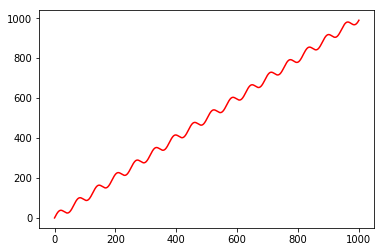

In [4]:
plt.plot(x_train, y_train, c="red")
plt.show()

In [5]:
num_samples = x_train.shape[0]
batch_size = 100

In [6]:
num_samples

10000

In [7]:
# define placeholders for input
x = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1))

In [8]:
# define variables to be learned
w = tf.get_variable("weights", (1, 1), initializer=tf.random_normal_initializer())
b = tf.get_variable("bias", (1, 1), initializer=tf.constant_initializer(0.0))

In [9]:
# prediction
y_pred = np.add(np.multiply(x, w), b)

# loss function
loss = tf.reduce_mean(tf.square(tf.subtract(y_pred, y)))

In [10]:
optimizer = tf.train.AdamOptimizer().minimize(loss) # set optimizer

In [11]:
iterations = 5000
with tf.Session() as sess:
    # initialize variables in graph
    sess.run(tf.global_variables_initializer())
    # iterations
    for step_idx in range(1, iterations+1):
        # select random mini-batch
        indices = np.random.choice(num_samples, batch_size)
        x_batch, y_batch = x_train[indices], y_train[indices]
        _, loss_val = sess.run([optimizer, loss], feed_dict={x: x_batch, y: y_batch})
        if step_idx > 1:
            if loss_val < prev_loss:
                w_val, b_val = sess.run([w, b])
                print("Index", step_idx, "->", "Loss Decreased:", loss_val)
                print()
                prev_loss = loss_val
        else:
            prev_loss = loss_val

Index 6 -> Loss Decreased: 3874.13

Index 7 -> Loss Decreased: 3471.7432

Index 8 -> Loss Decreased: 3435.5872

Index 11 -> Loss Decreased: 3112.2312

Index 12 -> Loss Decreased: 2840.1921

Index 20 -> Loss Decreased: 2778.519

Index 26 -> Loss Decreased: 2355.1704

Index 30 -> Loss Decreased: 2135.0193

Index 35 -> Loss Decreased: 2127.7808

Index 36 -> Loss Decreased: 1890.0101

Index 38 -> Loss Decreased: 1737.6892

Index 40 -> Loss Decreased: 1230.4287

Index 56 -> Loss Decreased: 1028.4015

Index 64 -> Loss Decreased: 979.4699

Index 70 -> Loss Decreased: 789.5069

Index 73 -> Loss Decreased: 785.3382

Index 78 -> Loss Decreased: 653.0846

Index 82 -> Loss Decreased: 602.0388

Index 89 -> Loss Decreased: 580.1612

Index 92 -> Loss Decreased: 502.54404

Index 103 -> Loss Decreased: 469.05664

Index 104 -> Loss Decreased: 401.53357

Index 105 -> Loss Decreased: 385.32245

Index 115 -> Loss Decreased: 370.29782

Index 118 -> Loss Decreased: 349.69086

Index 119 -> Loss Decreased: 299

In [12]:
w_val, b_val

(array([[0.9989058]], dtype=float32), array([[0.1500815]], dtype=float32))

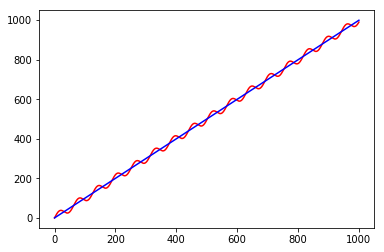

In [13]:
# test sample
x_test = x_train
y_test = x_test * np.float(w_val) + np.float(b_val)

# visualize results
plt.plot(x_train, y_train, c="red")
plt.plot(x_test, y_test, c="blue")
plt.show()

As expected since the model is a linear in nature, the prediction is linear and did not get the non-linear nature of the data.